In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/2017_2019.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                105120 non-null  int64  
 1   Month               105120 non-null  int64  
 2   Day                 105120 non-null  int64  
 3   Hour                105120 non-null  int64  
 4   Minute              105120 non-null  int64  
 5   Temperature         105120 non-null  float64
 6   Clearsky DHI        105120 non-null  int64  
 7   Clearsky DNI        105120 non-null  int64  
 8   Clearsky GHI        105120 non-null  int64  
 9   Dew Point           105120 non-null  float64
 10  DHI                 105120 non-null  int64  
 11  DNI                 105120 non-null  int64  
 12  GHI                 105120 non-null  int64  
 13  Relative Humidity   105120 non-null  float64
 14  Solar Zenith Angle  105120 non-null  float64
 15  Surface Albedo      105120 non-nul

In [ ]:
df.shape

(105120, 19)

In [ ]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2017,1,1,0,0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,NaN
1,2017,1,1,0,15,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,NaN
2,2017,1,1,0,30,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,NaN
3,2017,1,1,0,45,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,NaN
4,2017,1,1,1,0,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,NaN


In [ ]:
df=df.drop(['Unnamed: 18','Month','Day','Hour','Minute','Year'], axis = 1)

In [ ]:
df.head()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed
0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7
1,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7
2,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7
3,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6
4,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6


In [ ]:
df.corr()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed
Temperature,1.000000,0.458357,0.449082,0.531394,0.700764,0.424787,0.514912,0.576992,-0.794409,-0.553091,-0.052859,-0.465443,0.049851
Clearsky DHI,0.458357,1.000000,0.810307,0.871288,0.113832,0.855275,0.602214,0.750867,-0.556284,-0.840618,-0.248520,-0.154690,0.251301
Clearsky DNI,0.449082,0.810307,1.000000,0.927891,-0.037234,0.758458,0.833419,0.862925,-0.661066,-0.881674,-0.297980,-0.053208,0.302926
Clearsky GHI,0.531394,0.871288,0.927891,1.000000,0.055262,0.825109,0.789636,0.938968,-0.680070,-0.885754,-0.265644,-0.133931,0.266792
Dew Point,0.700764,0.113832,-0.037234,0.055262,1.000000,0.096268,-0.010381,0.062301,-0.153309,-0.134758,0.122466,-0.514076,-0.103097
DHI,0.424787,0.855275,0.758458,0.825109,0.096268,1.000000,0.522325,0.733511,-0.532825,-0.762094,-0.222753,-0.113162,0.192975
DNI,0.514912,0.602214,0.833419,0.789636,-0.010381,0.522325,1.000000,0.907556,-0.709469,-0.727416,-0.226391,-0.033519,0.205846
GHI,0.576992,0.750867,0.862925,0.938968,0.062301,0.733511,0.907556,1.000000,-0.725484,-0.816328,-0.233346,-0.114237,0.208753
Relative Humidity,-0.794409,-0.556284,-0.661066,-0.680070,-0.153309,-0.532825,-0.709469,-0.725484,1.000000,0.666253,0.181516,0.185783,-0.138153
Solar Zenith Angle,-0.553091,-0.840618,-0.881674,-0.885754,-0.134758,-0.762094,-0.727416,-0.816328,0.666253,1.000000,0.305616,0.175966,-0.258620


In [ ]:
df.isna().sum()

Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Wind Speed            0
dtype: int64

In [ ]:
df=df.drop(['Dew Point','Surface Albedo','Pressure','Wind Speed','Temperature','Clearsky DHI'], axis = 1)

In [ ]:
Y=df['GHI']
X=df.drop(columns=['GHI'])

<Axes: xlabel='Clearsky DNI', ylabel='GHI'>

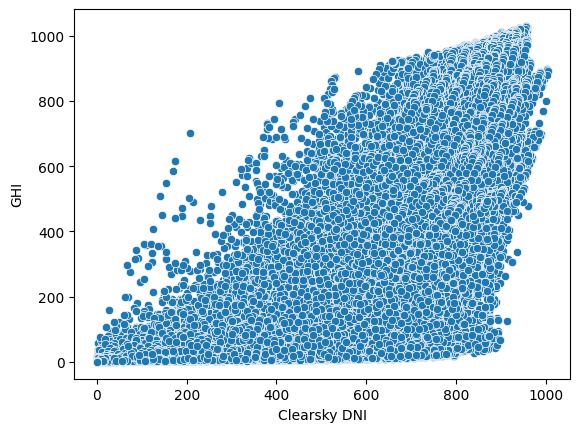

In [ ]:
sns.scatterplot(data=df,x='Clearsky DNI',y='GHI')

In [ ]:
X.head()

,Clearsky DNI,Clearsky GHI,DHI,DNI,Relative Humidity,Solar Zenith Angle
0,0,0,0,0,86.29,152.92
1,0,0,0,0,86.29,150.22
2,0,0,0,0,86.29,147.43
3,0,0,0,0,85.54,144.60
4,0,0,0,0,86.17,141.71


<Axes: xlabel='Clearsky GHI', ylabel='GHI'>

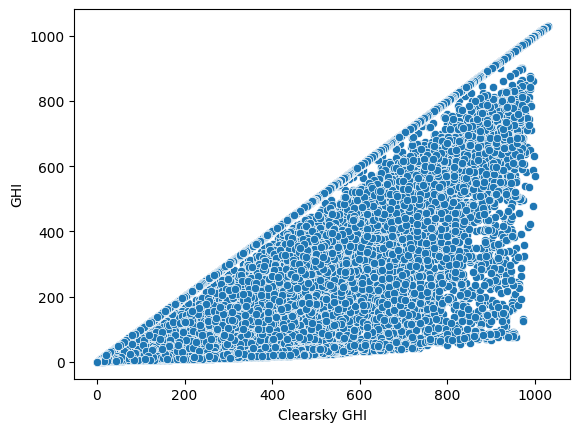

In [ ]:
sns.scatterplot(data=df,x='Clearsky GHI',y='GHI')

<Axes: xlabel='DHI', ylabel='GHI'>

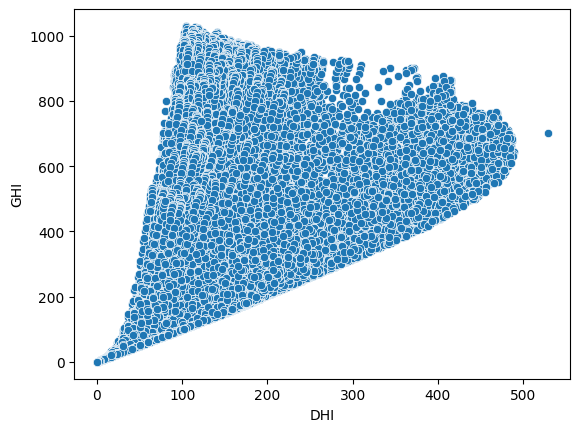

In [ ]:
sns.scatterplot(x=df['DHI'],y=df['GHI'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, ypred)
mse

1483.8490543213677

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 3
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

pipeline.fit(x_train_scaled, y_train)

# Predict on the scaled testing data
y_pred = pipeline.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
mse=mean_squared_error(y_test,y_pred)
mse

R-squared: 0.9999986912654882


0.11111201737440421

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 21024 entries, 103058 to 61818
Series name: GHI
Non-Null Count  Dtype
--------------  -----
21024 non-null  int64
dtypes: int64(1)
memory usage: 328.5 KB


<Axes: xlabel='DHI', ylabel='GHI'>

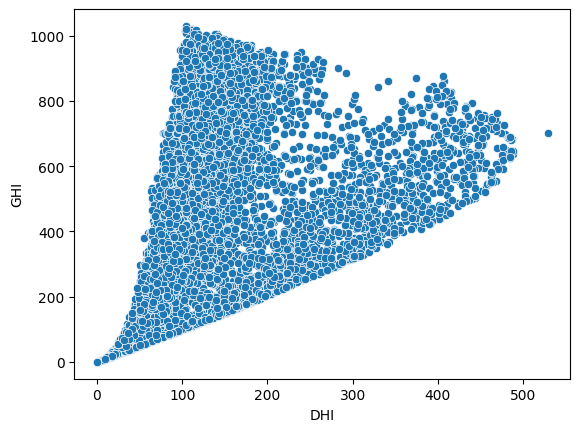

In [ ]:
sns.scatterplot(x=x_test['DHI'],y=y_test)

<Axes: xlabel='DHI'>

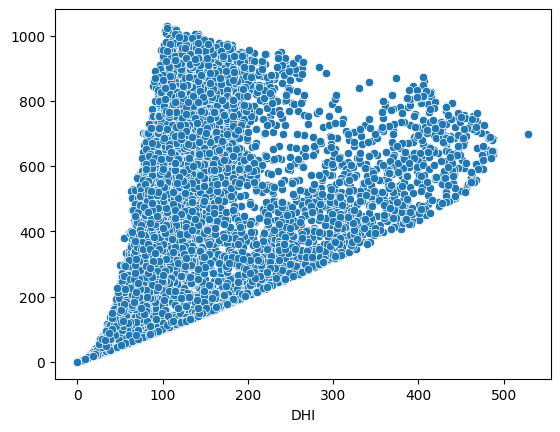

In [ ]:
sns.scatterplot(x=x_test['DHI'],y=y_pred)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming x_train, y_train, x_test, y_test are your training and testing data
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
 # Add 'accuracy' as a metric
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Now you can access the loss and accuracy history during training
print(history.history.keys())


Epoch 1/50
2103/2103 [==============================] - 6s 2ms/step - loss: 1433.3586 - mean_squared_error: 1433.3586 - val_loss: 8.6482 - val_mean_squared_error: 8.6482
Epoch 2/50
2103/2103 [==============================] - 4s 2ms/step - loss: 6.7189 - mean_squared_error: 6.7189 - val_loss: 4.8038 - val_mean_squared_error: 4.8038
Epoch 3/50
2103/2103 [==============================] - 4s 2ms/step - loss: 7.2245 - mean_squared_error: 7.2245 - val_loss: 4.0347 - val_mean_squared_error: 4.0347
Epoch 4/50
2103/2103 [==============================] - 5s 2ms/step - loss: 8.2310 - mean_squared_error: 8.2310 - val_loss: 184.4841 - val_mean_squared_error: 184.4841
Epoch 5/50
2103/2103 [==============================] - 4s 2ms/step - loss: 7.2921 - mean_squared_error: 7.2921 - val_loss: 11.1283 - val_mean_squared_error: 11.1283
Epoch 6/50
2103/2103 [==============================] - 4s 2ms/step - loss: 6.0640 - mean_squared_error: 6.0640 - val_loss: 3.2640 - val_mean_squared_error: 3.2640
Epoc

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

657/657 [==============================] - 1s 1ms/step
R^2 Score: 0.9999301323809213


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_true and y_pred are your true and predicted values respectively
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.11111201737440421
Mean Absolute Error: 0.18097645386164424
Root Mean Squared Error: 0.33333469272550104


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming X_train, y_train, X_test, y_test are your training and testing data
x_train_array = x_train.values
# Reshape input data
x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], 1, x_train_array.shape[1])
model = Sequential()
model.add(LSTM(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/50
2103/2103 [==============================] - 16s 6ms/step - loss: 106210.8125 - val_loss: 92879.8516
Epoch 2/50
2103/2103 [==============================] - 10s 5ms/step - loss: 80222.3125 - val_loss: 70105.5078
Epoch 3/50
2103/2103 [==============================] - 10s 5ms/step - loss: 60218.0234 - val_loss: 52042.9375
Epoch 4/50
2103/2103 [==============================] - 11s 5ms/step - loss: 44247.5117 - val_loss: 37683.3203
Epoch 5/50
2103/2103 [==============================] - 11s 5ms/step - loss: 31645.4746 - val_loss: 26501.5410
Epoch 6/50
2103/2103 [==============================] - 10s 5ms/step - loss: 21959.1738 - val_loss: 18051.9551
Epoch 7/50
2103/2103 [==============================] - 9s 4ms/step - loss: 14721.6240 - val_loss: 11808.0625
Epoch 8/50
2103/2103 [==============================] - 10s 5ms/step - loss: 9464.5645 - val_loss: 7363.7681
Epoch 9/50
2103/2103 [==============================] - 10s 5ms/step - loss: 5782.5918 - val_loss: 4353.4419
Epoch

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=int64)
      • training=False
      • mask=None
